###### TODO:

1.  Take MBDNL as the reference to quantify the error ( user relative error )

2.  Check for Cu and Alkaline Earth metals

3.  Find formal charges by beggar's analysis in MBDNL optimised geometry

4.  Consider absolute electronegetiy of each elements present also as a fetaure function ( for the mettalic things )

5.  Polarisibility 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
copper = pd.read_csv('Cu.csv')
copper_mbd = pd.read_csv('Cu_mbdnl.csv')

In [3]:
copper_mbd.head()

,cell_length,energy,E-dispersion
0,NaN,NaN,NaN
1,2.777431,14.479846,-3.56830
2,2.977431,-3.002095,-3.18611
3,3.177431,-11.667733,-2.84942
4,3.377431,-15.462080,-2.55013


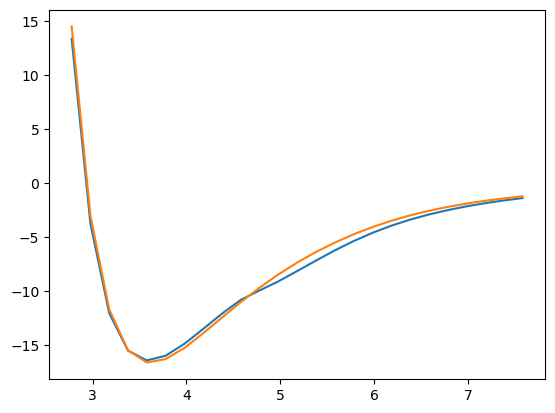

In [4]:
# plt.plot(cuppor['cell_length'], cuppor['energy'], 'o')
plt.plot(copper['cell_length'], copper['energy'])

# plt.plot(copper_mbd['cell_length'], copper_mbd['energy'], 'o')
plt.plot(copper_mbd['cell_length'], copper_mbd['energy'])

plt.show()

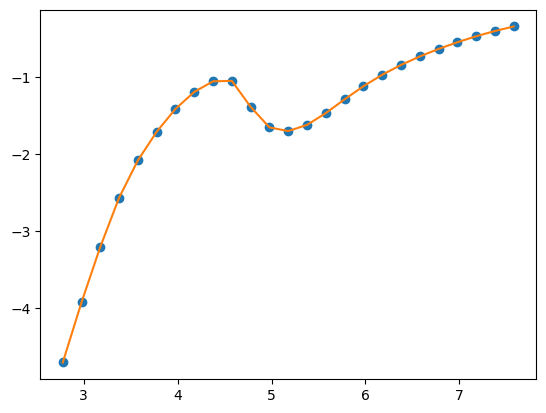

In [8]:
plt.plot(copper['cell_length'], copper['E-dispersion'], 'o')
plt.plot(copper['cell_length'], copper['E-dispersion'])
plt.show()

In [42]:
import itertools
import numpy as np

def generate_combinations(params, param_names, operators):
    results = []

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(params) + 1):
        for subset_indices in itertools.permutations(range(len(params)), r):  # Permutations of parameter indices
            subset = [params[i] for i in subset_indices]
            subset_names = [param_names[i] for i in subset_indices]

            if len(subset) == 1:
                expr_str = subset_names[0]
                expr_val = subset[0]
                results.append((expr_str, expr_val))
            else:
                for ops in itertools.product(operators, repeat=len(subset) - 1):
                    # Construct the expression as a string
                    expr_str = subset_names[0]
                    expr_val = subset[0]

                    for i in range(len(ops)):
                        expr_str += f" {ops[i]} {subset_names[i + 1]}"
                        if ops[i] == '*':
                            expr_val = expr_val * subset[i + 1]
                        elif ops[i] == '/':
                            expr_val = expr_val / subset[i + 1]
                    results.append((expr_str, expr_val))

    return results


(316, 2)

In [46]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.array([9, 10, 11, 12])
d = np.array([13, 14, 15, 16])
e = np.array([13, 14, 15, 16])
parameters = [a, b, c, d,e]
param_names = ['a', 'b', 'c', 'd','e']

# Define mathematical operators
operators = ['*', '/',]

# Generate and evaluate all expressions
all_expressions = generate_combinations(parameters, param_names, operators)

df = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

df.shape

(3165, 2)

In [47]:
values = pd.DataFrame()

for expr_str , expr_val in all_expressions:
    values[expr_str] = expr_val

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/1087073119.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/1087073119.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/1087073119.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [48]:
values.head()

correlation = values.corr()

correlation = correlation[correlation['a'] == 1]
correlation.tail()

,a,b,c,d,e,a * b,a / b,a * c,a / c,a * d,...,e * d / c / b * a,e * d / c / b / a,e / d * c * b * a,e / d * c * b / a,e / d * c / b * a,e / d * c / b / a,e / d / c * b * a,e / d / c * b / a,e / d / c / b * a,e / d / c / b / a
e * b / d,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e * c / d,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * a,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * b,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * c,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
